In [109]:
import quandl,  math, datetime
import pandas as pd
import numpy as np
from sklearn import preprocessing, svm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib import style
import pickle 


quandl.ApiConfig.api_key = 'SBm-nSyCM2_MsbtEMu4Y'
style.use('ggplot')






df = quandl.get('WIKI/GOOGL')

print(df.head())


              Open    High     Low    Close      Volume  Ex-Dividend  \
Date                                                                   
2004-08-19  100.01  104.06   95.96  100.335  44659000.0          0.0   
2004-08-20  101.01  109.08  100.50  108.310  22834300.0          0.0   
2004-08-23  110.76  113.48  109.05  109.400  18256100.0          0.0   
2004-08-24  111.24  111.60  103.57  104.870  15247300.0          0.0   
2004-08-25  104.76  108.00  103.88  106.000   9188600.0          0.0   

            Split Ratio  Adj. Open  Adj. High   Adj. Low  Adj. Close  \
Date                                                                   
2004-08-19          1.0  50.159839  52.191109  48.128568   50.322842   
2004-08-20          1.0  50.661387  54.708881  50.405597   54.322689   
2004-08-23          1.0  55.551482  56.915693  54.693835   54.869377   
2004-08-24          1.0  55.792225  55.972783  51.945350   52.597363   
2004-08-25          1.0  52.542193  54.167209  52.100830   53.1

In [110]:
# we are creating the Features for our Regression algorithm

df = df[['Adj. Open',  'Adj. High',  'Adj. Low',  'Adj. Close', 'Adj. Volume',]]

df['HL_PCT'] = (df['Adj. High'] - df['Adj. Close']) / df['Adj. Close'] * 100.0

df['PCT_change'] = (df['Adj. Close'] - df['Adj. Open']) / df['Adj. Open'] * 100.0

df = df[['Adj. Close', 'HL_PCT', 'PCT_change', 'Adj. Volume',]]

print(df.head())



            Adj. Close    HL_PCT  PCT_change  Adj. Volume
Date                                                     
2004-08-19   50.322842  3.712563    0.324968   44659000.0
2004-08-20   54.322689  0.710922    7.227007   22834300.0
2004-08-23   54.869377  3.729433   -1.227880   18256100.0
2004-08-24   52.597363  6.417469   -5.726357   15247300.0
2004-08-25   53.164113  1.886792    1.183658    9188600.0


In [111]:
forecast_col = 'Adj. Close'

# if there is missing data in our dataset

df.fillna('-99999', inplace=True)

forecast_out = int(math.ceil(0.01*len(df)))






In [112]:
# creating the dataframe for the label

df['label'] = df[forecast_col].shift(-forecast_out)




# print(df.tail())

print(df.head())




            Adj. Close    HL_PCT  PCT_change  Adj. Volume      label
Date                                                                
2004-08-19   50.322842  3.712563    0.324968   44659000.0  69.078238
2004-08-20   54.322689  0.710922    7.227007   22834300.0  67.839414
2004-08-23   54.869377  3.729433   -1.227880   18256100.0  68.912727
2004-08-24   52.597363  6.417469   -5.726357   15247300.0  70.668146
2004-08-25   53.164113  1.886792    1.183658    9188600.0  71.219849


In [113]:
# features are represented by Letter X and labels by y

X = np.array(df.drop(['label'], 1))




In [114]:
# lets scale our Features

X = preprocessing.scale(X)
X_lately = X[-forecast_out:]
X = X[:-forecast_out:]

# lets print our new output

df.dropna(inplace=True)

y = np.array(df['label'])
y = np.array(df['label'])


In [115]:

# print(len(X),len(y))

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2)




In [119]:
# for the classifiers for our features and labels

clf = LinearRegression()

# clf = svm.SVR(kernel='poly')

# for training
clf.fit(X_train, y_train)

# lets use pickle to save our algorithm model

# with open('linearregression.pickle','wb') as f:
#      pickle.dumps(clf, f)

# pickle_in = open('linearregression.pickle', 'wb')
# clf = pickle.load(pickle_in)


# for testing
accuracy = clf.score(X_test, y_test)

# lets print to show the accuracy of our model
# print(accuracy)




In [120]:
# lets start our prediction

forecast_set = clf.predict(X_lately)

# lets print the forecast_set

print(forecast_set, accuracy, forecast_out)



[1102.21874544 1071.84851773 1017.39098788 1061.00541206 1073.17152468
 1073.56074866 1092.30189715 1111.66330913 1114.40665765 1122.38076727
 1131.24021383 1129.17213898 1149.19868481 1164.85503742 1135.5013743
 1121.8024621  1086.88089281 1103.3918527  1114.29107023 1121.55522144
 1135.37233751 1150.12513921 1181.66953288 1185.7380526  1156.63221929
 1168.660384   1170.45887523 1152.92031745 1118.37674595 1115.13292408
 1112.60684699 1069.21772893 1040.89445463 1073.278762   1019.02631284] 0.9790506708705775 35


Text(0, 0.5, 'Price')

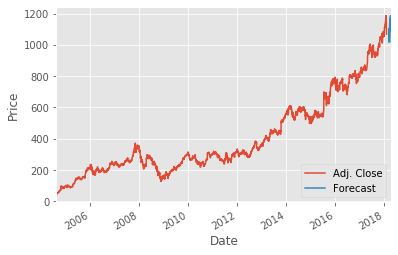

In [121]:
# lets do some stuff

df['Forecast'] = np.nan

last_date = df.iloc[-1].name

last_unix = last_date.timestamp()

one_day = 86400

next_unix = last_unix + one_day

for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += one_day
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)] + [i]
    
# lets do some plotting
    
df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')



